# DATA_SCI 422 and EARTH 353 | Exercise 2

## Sensing and Mapping the subsurface

In this exercise you will infer the subsurface structure of the Earth's outermost layers from measurements made at its surface. However, the techniques can also be applied to mapping subsurfaces of z-stacks in microscopy, unblurring an image, separating overlapping sources, and any other inverse problems where the data function is written as a Fredholm Integral of the First Kind.

Specifically in this exercise you will apply four different methods of regularization to solving the same inverse problem, an example from seismology. The first of the four methods (“damping”, “penalizing the norm of the model vector”, “Tikhonov regularization”), as well as "flattening" and "smoothing" have been covered in class, the fourth (SVD) will be covered on Thursday. Each of these methods is appropriate, and can play an important role in one or more particular class(es) of under- or mixed-determined inverse problems. For the example we use in this exercise, some might or might seem to provide “better” results than others. It is important to give some thought on what is "best" in the context of this exercise as well as in the context of inverse problems you would encounter in your research.

### Seismology Background
While *P* waves are the fastest-propagating type of seismic waves, surface waves are the slowest, as their energy is trapped and channeled near the Earth's surface, where lower pressure and interference slows the waves down. 

The image below is of a seismogram; the right half contains the surface wave.

![title](http://geophysics.earth.northwestern.edu/seismology/suzan/pictures/1_home/b_home_2-1.jpg)

A time-series record of a seismic surface wave (as shown above) is like a very-low frequency chirp. The chirpy character is caused by dispersion undergone by the wave as it propagates within the Earth’s layers that are closest to the surface. In other words, the dominant frequency changes along the time axis (the x-axis). Different arrival times for different frequencies are associated with frequency-dependent propagation velocities. These velocities are thus functions of the wave's dominant frequency $f $ (or wave period $T = 1/f $) and are called phase velocity $c(T) $. The values of $c(T) $ are determined by how the underlying structure of the Earth varies with depth.

### Mathematical description
The structure at a particular depth can be represented by a material property for the corresponding layer. This material property is perhaps confusingly called the *S* velocity $\beta (z) $, which is a function of depth $z $. The *S* velocity is the square root of the ratio of the shear modulus and the density.
Correspondingly, small anomalies $\delta \beta (z) $ in $\beta (z) $ lead to changes $ \delta c(T) $ in $c(T) $, via a so-called sensitivity kernel $\frac{\partial c}{\partial \beta} (T,z) $. Specifically:

$$ \delta c(T) = \int_{0}^{z_{max}} \frac{\partial c}{\partial \beta} (T,z)  \delta \beta (z) dz $$.


Before further dissecting this integral equation, let's first consider the following system of equations:

$$
\begin{pmatrix} 
\mathbf{G} \\
\epsilon \mathbf{R}
\end{pmatrix}
\mathbf{m}
=
\begin{pmatrix} 
\mathbf{d} \\
\mathbf{0}
\end{pmatrix}
$$

where $\mathbf{m} $ is the unknown vector of model parameters, $\mathbf{d} $ is the vector of observed data, $\mathbf{G} $ is the matrix that represents the relationship between model parameters and data, $\mathbf{R} $ is a regularization matrix (such as $\mathbf{I} $ in a damped inverse problem), and $\epsilon $ is a weigthing factor for the regularization, sometimes called a Lagrange multiplier. 

**Question 1**: Use the standard expression for the least squares solution, $\mathbf{m} = (\mathbf{G}^T \mathbf{G})^{-1} \mathbf{G}^T \mathbf{d} $ (for an overdetermined inverse problem $\mathbf{Gm} = \mathbf{d} $) to show that the least-squares solution of a regularized inverse problem (see above) is
$$
\mathbf{m} = (\mathbf{G}^T \mathbf{G} + \epsilon^2 \mathbf{R}^T \mathbf{R})^{-1} \mathbf{G}^T \mathbf{d} 
$$

----------> Answer: 

Let us define matrix G' and vector d': $$\mathbf{G'} = \begin{pmatrix} \mathbf{G} \\\epsilon \mathbf{R}\end{pmatrix}
, \mathbf{d'} = \begin{pmatrix} \mathbf{d} \\\ \mathbf{0}\end{pmatrix}$$ so now our system of equations is $\mathbf{G'm} = \mathbf{d'}$. From the standard expression for the least squares solution, we can use G' and d':
$$\mathbf{m} = (\mathbf{G'}^T \mathbf{G'})^{-1} \mathbf{G'}^T \mathbf{d'}$$

Where $$\mathbf{G'}^T = (\mathbf{G'}^T          \epsilon\mathbf{R}^T)  $$
$$\mathbf{G'}^T \mathbf{G'} = (\mathbf{G'}^T          \epsilon\mathbf{R}^T) \begin{pmatrix} \mathbf{G} \\\epsilon \mathbf{R}\end{pmatrix} = (\mathbf{G}^T \mathbf{G} + \epsilon^2 \mathbf{R}^T \mathbf{R}) $$

We then can substitute this expression above into the m vector expression. This then shows that the least-squares solution of a regularized inverse problem is: 
$$\mathbf{m} = (\mathbf{G}^T \mathbf{G} + \epsilon^2 \mathbf{R}^T \mathbf{R})^{-1} \mathbf{G}^T \mathbf{d} $$

A surface wave’s phase velocity deviations (from a standard), $\delta c(T) $, can be measured from a seismogram at discrete values of T and represents the data $d_i = \delta c(T_i) $. The unknown model $\delta \beta (z) $ represents the extent to which the Earth's layer properties deviate from the same standard. We choose to parameterize $\delta \beta (z) $ as layer-average values at discrete depths $z_j $, which do not need to be at equal distances form each other. Therefore $m_j = \delta \beta(z_j) $. If the model parameters $\delta \beta(z_j) $ are not known, they can be inferred from the measured data $\delta c(T_i) $ through inversion of the forward problem (given above). In this exercise the data have negligible errors. 
Rewriting the above Fredholm integral equation as a sum over discrete layers for a range of values for T produces the following, familiar system of equations
$$
\mathbf{Gm} = \mathbf{d}
$$
where $\mathbf{G} $ is constructed fromt he remaining elements of the original integral equation

$$
G_{ij} = \frac{\partial c}{\partial \beta} (T_i,z_j) \Delta z_j
$$

where $\Delta z_j $ is the thickness of the $j-th $ layer at depth $z_j $.

**Question 2**: Verify that you downloaded the following files along with this notebook: 
1. `vs0.txt`  -- the S-velocity of the standard model $\beta (z_j) $
2. `vf.txt`   -- the standard and measured phase velocities, $c(T_i) $ and $c(T_i) + \delta c(T_i) $ 
3. `dcdb.txt` -- the partial derivatives that constitute the elements of matrix $\mathbf{G} $

Then read them into this notebook. You may run the following code to do so.

In [213]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

earthstructure = open('vs0.txt','r').readlines()
z = array([float(s.split()[0]) for s in earthstructure]) 
vs0 = array([float(s.split()[1]) for s in earthstructure])

k = len(vs0)
d = zeros(k)
# layer thicknesses: 
d[0] = 0.5*(z[1] - z[0]) 
for i in arange(1,k-1):
    d[i] = 0.5*(z[i+1] - z[i-1])
d[k-1] = 0.5*(z[k-1] - z[k-2])

phasevelocities = open('vf.txt','r').readlines()
T = array([float(s.split()[0]) for s in phasevelocities]) 
vf0 = array([float(s.split()[1]) for s in phasevelocities]) 
vfm = array([float(s.split()[2]) for s in phasevelocities]) 
dvf = vfm - vf0

n = len(vfm)
Gt = zeros([k,n])
dcdb = open('dcdb.txt','r').readlines()
for j in arange(k):
    Gt[j] = array([float(s) for s in dcdb[j].split()])*d[j] 
G = Gt.T

You have now loaded the residual phase velocity data in the array `dvf` (in km/s), the corresponding periods in array `T` (in s), and the matrix $\mathbf{G} $ in 2-dimensional array `G`. The S- and phase velocity of the standard model are stored in arrays `vs0` and `vf0` (in km/s), respectively. The values in `vs0` correspond to the depths in array `z`. `G` has `n` rows and `k` columns, does it?

**Question 3**: Print n and k: Is the inverse problem $\mathbf{Gm} = \mathbf{d} $
overdetermined, underdetermined, exact-determined, or mixed- determined? Why?

In [214]:
print('G matrix shape:',G.shape)
print('data vector shape:',dvf.shape)
print('n:',n, 'k:',k)

G matrix shape: (10, 28)
data vector shape: (10,)
n: 10 k: 28


----------> Answer: We have found that n = 10 and k = 28. Here, we know that model vector m has 28 componenentns while data vector has 10 components. We know this from matrix multiplication properties (from previous Math courses about matrix multiplication requirements for matrices of different dimensions). Evidently, there are more model componenets than data components (the phase velocities), then the inverse problem $\mathbf{Gm} = \mathbf{d} $ is underdetermined. 

**Question 4**: Plot `vs0(z)` and `vf0(T)` in separate graphs. Also plot the data `vfm(T)`. Compare `vfm` with `vf0`: Do you expect the values of `vs(z) = vs0(z) + dvs(z)`, where `dvs[j]` $= m_j $, to be lower or higher than `vs0(z)`?

----------> Answer: The values of vs(z) = (vs0(z) + dvs(z)) are expected to be LOWER than vs0(z). From Question 5, we see that G matrix is mostly positive. To give an overall negative dvf, dvs should be negatve for the most part. S velocities are expected to be a a little slower/lower than the reference S velocities. To be more precise, from looking at the plot of vf0 and vfm below, we can say that S velocities from vs(z) should only be higher than vs0(z) at low periods but lower at other velocities (past the intersection between the two curves).

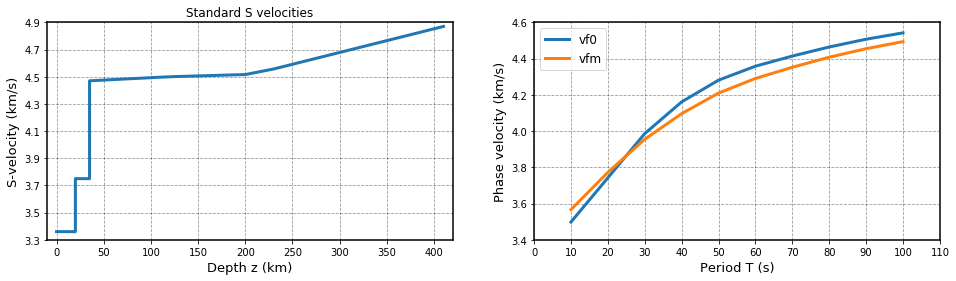

In [215]:
##### Plot of vs0(z)
fig1, (ax1,ax2) = subplots(1,2,figsize=(16,4))
ax1.set_title('Standard S velocities')
ax1.set_xlim(-10,420); ax1.set_ylim(3.3,4.9)
ax1.set_xlabel('Depth z (km)',fontsize=13); ax1.set_ylabel('S-velocity (km/s)',fontsize=13)
ax1.plot(z,vs0,linewidth=3)
ax1.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
ax1.set_yticks([3.3,3.5,3.7,3.9,4.1,4.3,4.5,4.7,4.9])

##### Plot of vfm(T) and vf0(T) to compare them
ax2.set_xlim(0,110); ax2.set_ylim(3.4,4.6)
ax2.plot(T,vf0,label='vf0',linewidth=3)
ax2.plot(T,vfm,label='vfm',linewidth=3)
ax2.legend(fontsize=12)
ax2.set_xlabel('Period T (s)',fontsize=13); ax2.set_ylabel('Phase velocity (km/s)',fontsize=13)
ax2.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
ax2.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax2.set_yticks([3.4,3.6,3.8,4.0,4.2,4.4,4.6])
plt.rcParams['axes.linewidth'] = 1.5
show()

The matrix `G` contains the partial derivatives of `vf` to `vs`, which tell us how large the effect is of an anomaly in `vs` at depth `j` on `vf` at period `i`. In other words G represents the sensitivity of `dvf(T)` to `dvs(z)`. 

**Question 5**: Now visualize the matrix `G`, or its transpose, to show the sensitivity kernels. For example, you could plot $\mathbf{G}^T $ as an image with command `imshow()`. 

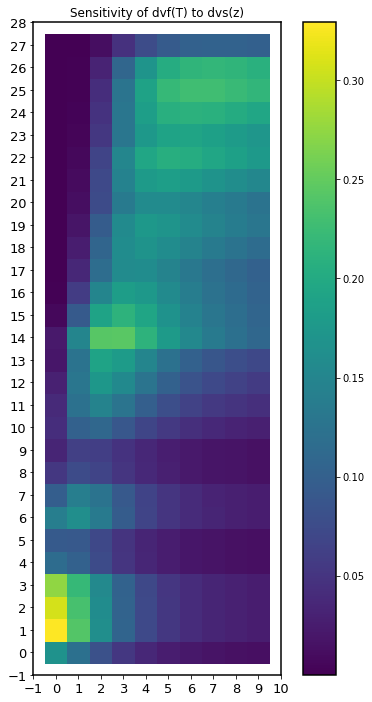

In [216]:
##### Visualize the transpose of matrix G to show the sensitivity kernels 
G_T = G.transpose()
plt.figure(figsize=(8, 12))
plt.title('Sensitivity of dvf(T) to dvs(z)')
plt.ylim(-1,28); plt.xlim(-1,10)
plt.yticks([-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], fontsize = 13) 
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10], fontsize = 13) 
plt.imshow(G_T)
plt.rcParams['axes.linewidth'] = 1.5
plt.colorbar()
plt.show()

**Question 6**: Apply a damped least squares inversion to the given problem. Choose $\epsilon $ such that the predicted phase velocity curve provides an acceptable fit to the data while keeping `dvs(z)` small. Plot `vs0 + dvs`. Also plot the phase velocity curve predicted by `vs0 + dvs` and compare it with the data.

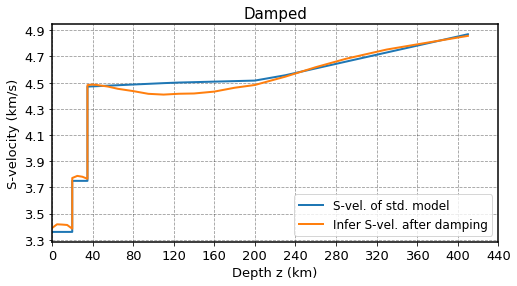

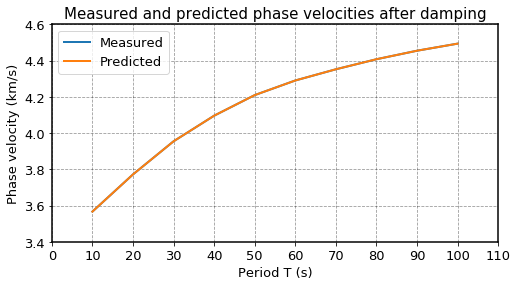

In [217]:
##### Apply a damped least squares inversion to the given problem. Least Square Solution.
Rd = np.identity(28) # making the matrix described in class for damping
Rd_T = Rd.transpose(); G_T = G.transpose()
epsilon = 0.001 # choosing an appropriate epsilon
GtG = np.dot(G_T, G); RtR = np.dot(Rd_T, Rd)
part_one_of_m = np.linalg.inv(GtG + (epsilon**2)*RtR) # splitting the calc. of matrix m into two parts
m_d = part_one_of_m @ G_T @ dvf # recently learned that using @ can substitute for np.dot
predicted_vf_d = dot(G,m_d) + vf0

##### Plot 1. S-velocity of the standard model and inferred S-velocity after damping
plt.figure(figsize=(8,4))
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0+m_d,label='Infer S-vel. after damping',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.title('Damped',fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([3.3,3.5,3.7,3.9,4.1,4.3,4.5,4.7,4.9],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

##### Plot 2. Measured phase velocity and predicted phase velocity curves
plt.figure(figsize=(8,4))
plt.plot(T,vfm,label='Measured',linewidth=2)
plt.plot(T,predicted_vf_d,label='Predicted',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,110)
plt.xlabel('Period T (s)',fontsize=13); plt.ylabel('Phase velocity (km/s)',fontsize=13)
plt.title('Measured and predicted phase velocities after damping',fontsize=15)
plt.legend(fontsize=13)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110],fontsize=13)
plt.yticks([3.4,3.6,3.8,4.0,4.2,4.4,4.6],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

**Question 7**: Apply a flattened least squares inversion to the given problem. Choose $\epsilon $ such that the predicted phase velocity curve provides an acceptable fit to the data while keeping `dvs(z)` flat (i.e. keeping the first derivative of `vs(z)` small). Plot `vs = vs0 + dvs`. Also plot the phase velocity curve predicted by `vs` and compare it with the data.

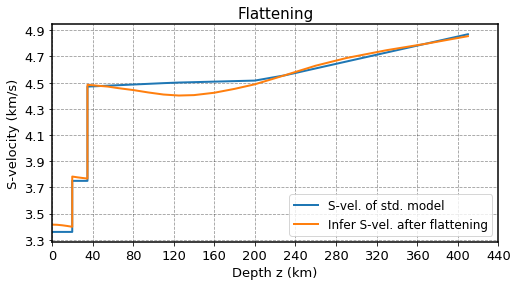

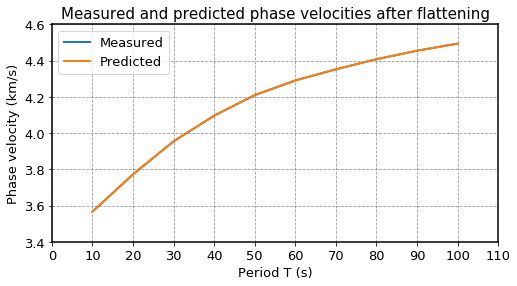

In [218]:
##### Apply a flattened least squares inversion to the given problem. Least Square Solution.
Rf = zeros([27,28]) # starting with a matrix filled with zeroes. This is a 27 by 28 matrix (almost square).
# No damping at endpoints noted from OH.
for i in range(27): # making the matrix described in class for flattening where there is a pattern of 1s and -1s
    Rf[i][i] = 1 # diagonal is filled with ones
    Rf[i][i+1] = -1 # the element next to the diagonal is -1
    
Rf_T = Rf.transpose(); G_T = G.transpose() #same as in Question 6
epsilon = 0.001
GtG = np.dot(G_T,G); RtR = np.dot(Rf_T,Rf)
part_one_of_m = np.linalg.inv(GtG + (epsilon**2)*RtR)
m_f = part_one_of_m @ G_T @ dvf; predicted_vf_f = dot(G,m_f) + vf0

##### Plot 1. S-velocity of the standard model and inferred S-velocity after flattening
plt.figure(figsize=(8,4))
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0+m_f,label='Infer S-vel. after flattening',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.title('Flattening',fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([3.3,3.5,3.7,3.9,4.1,4.3,4.5,4.7,4.9],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

##### Plot 2. Measured phase velocity and predicted phase velocity curves
plt.figure(figsize=(8,4))
plt.plot(T,vfm,label='Measured',linewidth=2)
plt.plot(T,predicted_vf_f,label='Predicted',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,110)
plt.xlabel('Period T (s)',fontsize=13); plt.ylabel('Phase velocity (km/s)',fontsize=13)
plt.title('Measured and predicted phase velocities after flattening',fontsize=15)
plt.legend(fontsize=13)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110],fontsize=13)
plt.yticks([3.4,3.6,3.8,4.0,4.2,4.4,4.6],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

**Question 8**: Apply a smoothed least squares inversion to the given problem. Choose $\epsilon $ such that the predicted phase velocity curve provides an acceptable fit to the data while keeping `dvs(z)` smooth (i.e. keeping the second derivative of `vs(z)` small). Plot `vs = vs0 + dvs`. Also plot the phase velocity curve predicted by `vs` and compare it with the data.

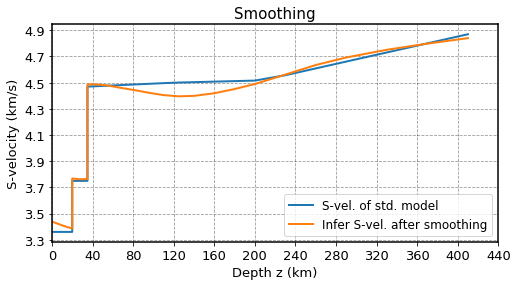

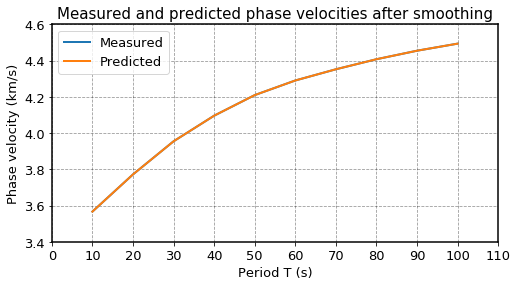

In [219]:
##### Apply a smoothed least squares inversion to the given problem. Least Square Solution.
Rs = zeros([26,28]) # starting with a matrix filled with zeroes. This is a 26 by 28 matrix.
for i in range(26): # making the matrix described in class for flattening where there is a pattern of 1s and -1s
    Rs[i][i] = 1 # diagonal is filled with ones
    Rs[i][i+1] = -2 # the element next to the diagonal is -2
    Rs[i][i+2] = 1
    
Rs_T = Rs.transpose(); G_T = G.transpose() #same as in Question 6
epsilon = 0.001
GtG = np.dot(G_T,G); RtR = np.dot(Rs_T,Rs)
part_one_of_m = np.linalg.inv(GtG + ((epsilon**2)*RtR))
m_s = part_one_of_m @ G_T @ dvf; predicted_vf_s = dot(G,m_s) + vf0

# ##### Plot 1. S-velocity of the standard model and inferred S-velocity after smoothing
plt.figure(figsize=(8,4))
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0+m_s,label='Infer S-vel. after smoothing',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.title('Smoothing',fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([3.3,3.5,3.7,3.9,4.1,4.3,4.5,4.7,4.9],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

# ##### Plot 2. Measured phase velocity and predicted phase velocity curves
plt.figure(figsize=(8,4))
plt.plot(T,vfm,label='Measured',linewidth=2)
plt.plot(T,predicted_vf_s,label='Predicted',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,110)
plt.xlabel('Period T (s)',fontsize=13); plt.ylabel('Phase velocity (km/s)',fontsize=13)
plt.title('Measured and predicted phase velocities after smoothing',fontsize=15)
plt.legend(fontsize=13)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110],fontsize=13)
plt.yticks([3.4,3.6,3.8,4.0,4.2,4.4,4.6],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

**Question 9**: Solve the given problem through singular value decomposition of $\mathbf{G} $.
Matrices $\mathbf{U} $, $\mathbf{S} $, and $\mathbf{V} $ can be obtained from the `numpy.linalg.svd` function. Form $\mathbf{S}^{-1} $ by inverting the diagonal elements of $\mathbf{S}^T $ that are larger than a cut-off value, while setting the remaining diagonal elements to `0`. Choose the cut-off value such that the predicted phase velocity curve provides an acceptable fit to the data while keeping `dvs(z)` small. Plot `vs = vs0 + dvs`, and call this model `vsw`. Also plot the phase velocity curve predicted by `vs` and compare it with the data.

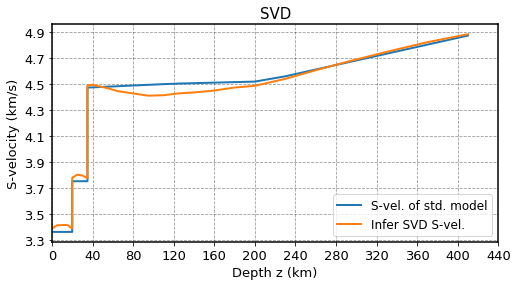

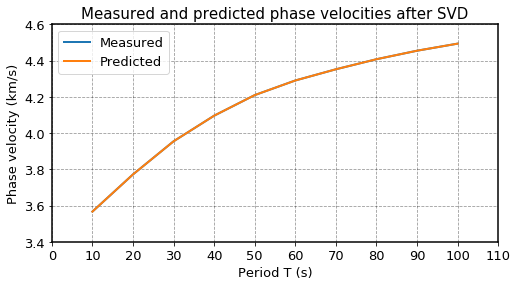

In [220]:
U,S,VT = np.linalg.svd(G, full_matrices=True) #Matrices U,S, and V can be obtained from the numpy.linalg.svd function
UT = np.transpose(U) #shape 10x10
V = np.transpose(VT) #shape 10x28, VT shape = 28x28

##### S-1 by inverting the diagonal elements of ST that are larger than a cut-off value and setting others to 0
cut_off = 0.001
ST = np.transpose(S)
diagonals = []
for i in range(len(ST)):
    if ST[i] > cut_off: #cutoff value choisen such that the predicted phase velocity curve is an acceptable fit to data
        diagonals.append(1/ST[i])
    elif ST[i] < cut_off:
        diagonals.append(0)
Sdiag = np.diag(diagonals)
zeroes = np.zeros((10,18))
s_append = np.append(Sdiag, zeroes, axis=1) #shape 10x28
s_inverse = (s_append)
s_inverseT = np.transpose(s_inverse) # done so it can be inthe shape 28x10
# # ###### Using above to compute vsw 
m_svd = V @ s_inverseT @ UT @ dvf
dvs = m_svd
predicted_vs = dot(G,m_svd) + vf0
vsw = vs0 + m_svd #call this model vsw

# # # ##### Plot 1. S-velocity of the standard model and inferred S-velocity after SVD
plt.figure(figsize=(8,4))
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0 + m_svd,label='Infer SVD S-vel.',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.title('SVD',fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([3.3,3.5,3.7,3.9,4.1,4.3,4.5,4.7,4.9],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

# ##### Plot 2. Measured phase velocity and predicted phase velocity curves
plt.figure(figsize=(8,4))
plt.plot(T,vfm,label='Measured',linewidth=2)
plt.plot(T,predicted_vs,label='Predicted',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,110)
plt.xlabel('Period T (s)',fontsize=13); plt.ylabel('Phase velocity (km/s)',fontsize=13)
plt.title('Measured and predicted phase velocities after SVD',fontsize=15)
plt.legend(fontsize=13)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110],fontsize=13)
plt.yticks([3.4,3.6,3.8,4.0,4.2,4.4,4.6],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

**Question 10**: Which of the four S-velocity models, `vs`, derived above would you nominate for "best solution"? Why? 

Name your choice for the best model `vsa`, and the second best `vsb`.

----------> Answer: The "best solution" model really depends on what our criteria are. The difference between the solutions and the data is relatively small (to the e-6 magnitude), which makes sense our problem is underdetermined, so we should be getting 0 differenc (or close to 0). So instead, I base my choice of the best solution on what is the smoothest looking model and the sharp jumps should all be below 90 km. My choice for best solution is then "Flattening," and my choice for the second best solution is "Smoothing." A difference between my choice of "Flattening" and "Smoothing" is that at higher depths, it appears the flattening is more similar to the standard model while smoothing results in values lower than the standard model. 

I did not pick damping and SVD because both of these solutions both have some small jags along the curve. My expectation for the ideal model for velocity is that the velocities should be smooth with depth apart from the breaks in the subsurface composition (which are typically below 90km). 

In [221]:
vsa = m_f; vsb = m_s  #Name your choice for the best model vsa, and the second best vsb.

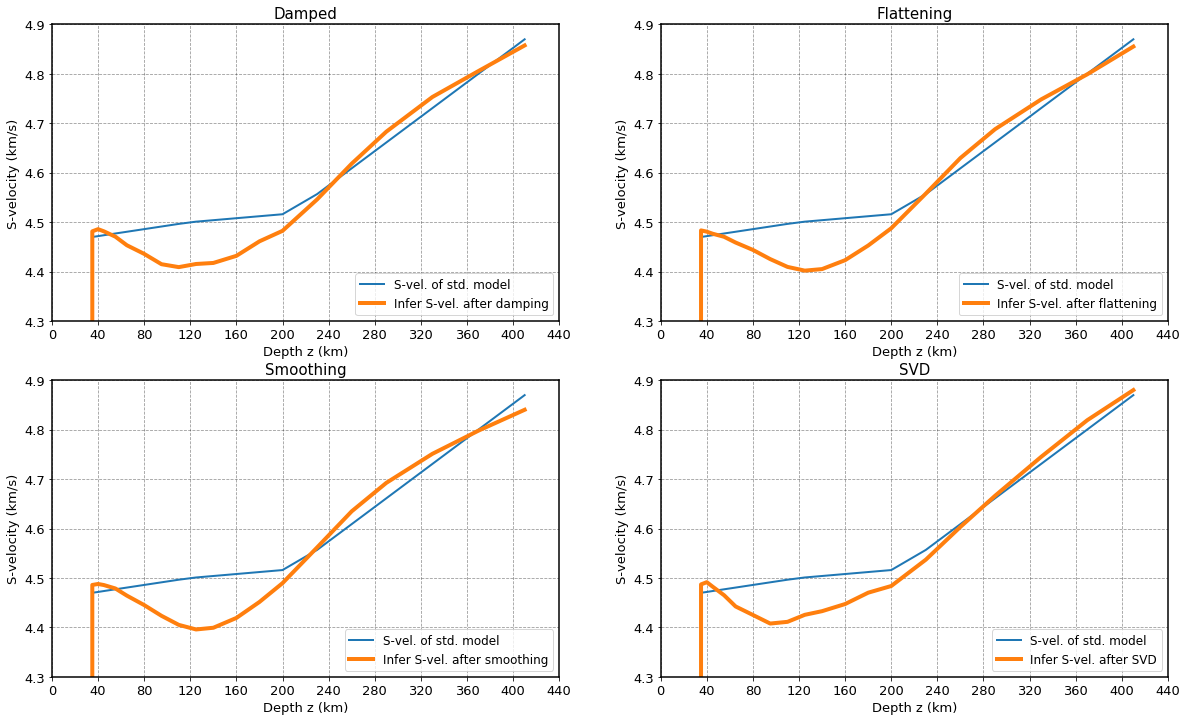

In [222]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2, 2, 1)
plt.ylim(4.3,4.9)
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0+m_d,label='Infer S-vel. after damping',linewidth=4)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.title('Damped',fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([4.3,4.4,4.5,4.6,4.7,4.8,4.9],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5

plt.subplot(2, 2, 2)
plt.ylim(4.3,4.9)
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0+m_f,label='Infer S-vel. after flattening',linewidth=4)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.title('Flattening',fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([4.3,4.4,4.5,4.6,4.7,4.8,4.9],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5

plt.subplot(2, 2, 3)
plt.ylim(4.3,4.9)
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0+m_s,label='Infer S-vel. after smoothing',linewidth=4)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.title('Smoothing',fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([4.3,4.4,4.5,4.6,4.7,4.8,4.9],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5

plt.subplot(2, 2, 4)
plt.ylim(4.3,4.9)
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0+m_svd,label='Infer S-vel. after SVD',linewidth=4)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.title('SVD',fontsize=15)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([4.3,4.4,4.5,4.6,4.7,4.8,4.9],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

In [223]:
diff_f = vfm - predicted_vf_f; print(sum(diff_f))
diff_s = vfm - predicted_vf_s; print(sum(diff_s))
diff_d = vfm - predicted_vf_d; print(sum(diff_d))
diff_svd = vfm - predicted_vs; print(sum(diff_svd))
# Conclusion --> there are negligible differences between the methods

-2.3441745997665464e-06
-7.957595977714504e-07
-3.8032673175258935e-06
-6.7991360896968445e-06


**Question 11**: Choose a vector (name it `dvsn`) in the nullspace of $\mathbf{G} $. Plot `vs = vsa + dvsn` and find a way to verify that indeed $\mathbf{G} \cdot \mathbf{dvsn} = \mathbf{0} $.

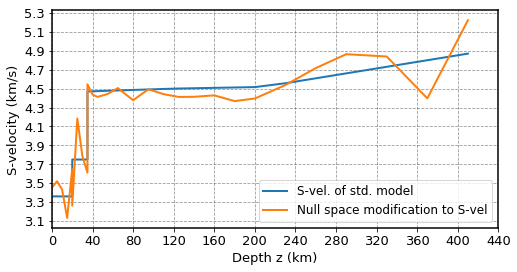

[ 1.18408589e-17 -1.52872506e-17 -6.07153217e-18 -5.20417043e-18
 -1.73472348e-17 -2.42861287e-17  5.20417043e-18  3.46944695e-18
 -1.38777878e-17  0.00000000e+00]


In [224]:
U,S,V = np.linalg.svd(G)

vsa = m_s #best model is labelled as vsa
dvsn = V[-1] # Choose a column of V as the null space, from comments in OH. This is last column.
vs = vsa + dvsn

plt.figure(figsize=(8,4))
plt.plot(z,vs0,label='S-vel. of std. model',linewidth=2)
plt.plot(z,vs0 + vs,label='Null space modification to S-vel',linewidth=2)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.4)
plt.xlim(0,420)
plt.xlabel('Depth z (km)',fontsize=13); plt.ylabel('S-velocity (km/s)',fontsize=13)
plt.legend(fontsize=12,loc='lower right')
plt.xticks([0,40,80,120,160,200,240,280,320,360,400,440],fontsize=13)
plt.yticks([3.1,3.3,3.5,3.7,3.9,4.1,4.3,4.5,4.7,4.9,5.1,5.3],fontsize=13)
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

print(np.dot(G,dvsn)) # indeed practically 0. Verified.

**Question 12**: Should `vsa - vsb` be in the null space of $\mathbf{G} $? Is it? Why (not)?

----------> Answer: vsa and vsb are both best models, where vsa is the best and vsb is the second best. These models are very close to each other, so their differences yield values close to 0. We can thus think of the differences vector as a 0 vector. The 0 vector is always in the null space of G. Thus, vsa - vsb should be in the null space of G. We verify it below. It is indeed in the null space of G (the values of G dot dvsn_new are very close to 0). 

In [225]:
vsa = m_f; vsb = m_s
dvsn_new = vsa - vsb # repeat process as done in Question 11
print(np.dot(G,dvsn_new)) # verify that G dot dvsn = 0. Indeed practically 0. Verified.
print(sum(np.dot(G,dvsn_new)))

[-2.27540146e-07  1.95991832e-06 -8.18727665e-06  1.51206480e-05
 -2.51294318e-06 -9.71932577e-06 -7.01399393e-06 -1.14234564e-06
  3.91070377e-06  9.36057024e-06]
1.5484150030913938e-06
